In [82]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.style.use('ggplot')
%matplotlib inline

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [84]:
df_train = pd.read_csv('/Users/izaserpa/Downloads/testfiles/train.csv')
df_test = pd.read_csv('/Users/izaserpa/Downloads/testfiles/test.csv')

In [85]:
df_train.head(4)

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A


In [86]:
df_train.shape

(13730, 167)

In [87]:
df_test.head(4)

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A


In [88]:
df_test.shape

(4576, 47)

In [89]:
df_test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [90]:
features_corr = ['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH',
                 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'TP_SEXO']

In [91]:
features_init = ['NU_NOTA_MT', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 
                 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE',
                 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 
                 'TP_ENSINO', 'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC', 
                 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 
                 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 
                 'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN', 
                 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'CO_PROVA_CN', 
                 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 
                 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA', 
                 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 
                 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 
                 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 
                 'Q025', 'Q026', 'Q027', 'Q047']

In [92]:
df_train_features = df_train[features_init]
df_train_features.shape

(13730, 47)

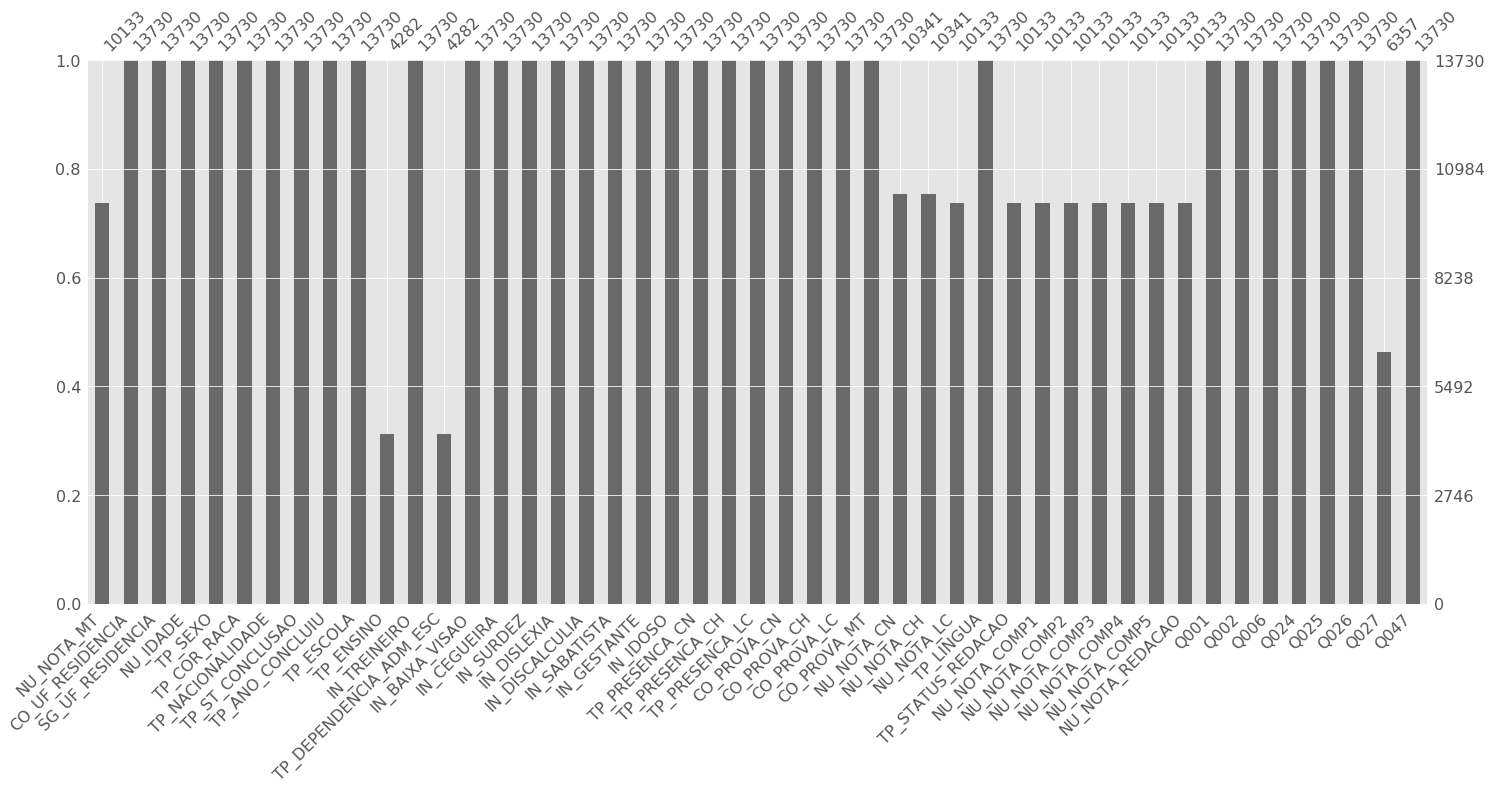

In [93]:
msno.bar(df_train_features)
plt.show()

In [94]:
status_train = pd.DataFrame({'columns': df_train_features.columns,
                             'type': df_train_features.dtypes,
                             'Sum of NaN': df_train_features.isnull().sum(),
                             'NaN%': df_train_features.isnull().sum()/len(df_train_features)})
status_train.reindex(columns=['type','Sum of NaN','NaN%']).sort_values(by = 'Sum of NaN', ascending=False)

,type,Sum of NaN,NaN%
TP_DEPENDENCIA_ADM_ESC,float64,9448,0.688128
TP_ENSINO,float64,9448,0.688128
Q027,object,7373,0.536999
NU_NOTA_LC,float64,3597,0.261981
TP_STATUS_REDACAO,float64,3597,0.261981
NU_NOTA_COMP1,float64,3597,0.261981
NU_NOTA_COMP2,float64,3597,0.261981
NU_NOTA_COMP3,float64,3597,0.261981
NU_NOTA_COMP4,float64,3597,0.261981
NU_NOTA_COMP5,float64,3597,0.261981


In [95]:
df_train_features = df_train_features.fillna(-500)
df_train_features.isnull().sum().sort_values(ascending = False).head()

Q047            0
IN_TREINEIRO    0
IN_IDOSO        0
IN_GESTANTE     0
IN_SABATISTA    0
dtype: int64

In [96]:
df_train_features['TP_SEXO'] = df_train_features['TP_SEXO'].map({'M':1, 'F':0}) 

In [97]:
df_train_features.dtypes

NU_NOTA_MT                float64
CO_UF_RESIDENCIA            int64
SG_UF_RESIDENCIA           object
NU_IDADE                    int64
TP_SEXO                     int64
TP_COR_RACA                 int64
TP_NACIONALIDADE            int64
TP_ST_CONCLUSAO             int64
TP_ANO_CONCLUIU             int64
TP_ESCOLA                   int64
TP_ENSINO                 float64
IN_TREINEIRO                int64
TP_DEPENDENCIA_ADM_ESC    float64
IN_BAIXA_VISAO              int64
IN_CEGUEIRA                 int64
IN_SURDEZ                   int64
IN_DISLEXIA                 int64
IN_DISCALCULIA              int64
IN_SABATISTA                int64
IN_GESTANTE                 int64
IN_IDOSO                    int64
TP_PRESENCA_CN              int64
TP_PRESENCA_CH              int64
TP_PRESENCA_LC              int64
CO_PROVA_CN                object
CO_PROVA_CH                object
CO_PROVA_LC                object
CO_PROVA_MT                object
NU_NOTA_CN                float64
NU_NOTA_CH    

In [98]:
features_final = ['NU_NOTA_MT', 'TP_SEXO', 'NU_NOTA_CN', 'NU_NOTA_CH',
                 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

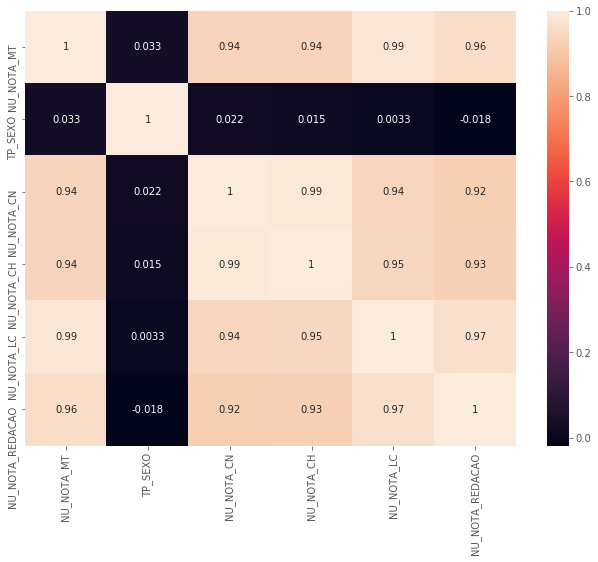

In [99]:
corr = df_train_features[features_final].corr()
ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10})

In [100]:
df_train = df_train_features[features_final]

In [104]:
df_train.shape

(13730, 6)

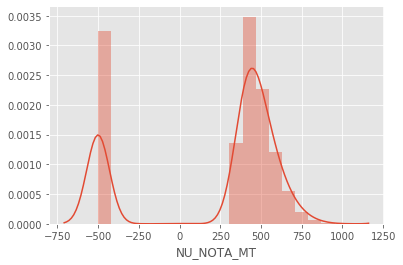

In [105]:
sns.distplot(df_train['NU_NOTA_MT'])

In [106]:
df_test = df_test.fillna(-500)

In [107]:
df_test['TP_SEXO'] = df_test['TP_SEXO'].map({'M':1, 'F':0}) 

In [108]:
features_ult = ['TP_SEXO', 'NU_NOTA_CN', 'NU_NOTA_CH',
                'NU_NOTA_LC', 'NU_NOTA_REDACAO']

In [109]:
y_train = df_train['NU_NOTA_MT']
x_train = df_train[features_ult]
x_test = df_test[features_ult]

In [110]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [111]:
regressor = RandomForestRegressor( 
           criterion='mae', 
           max_depth=8,
           max_leaf_nodes=None,
           min_impurity_split=None,
           min_samples_leaf=1,
           min_samples_split=2,
           min_weight_fraction_leaf=0.0,
           n_estimators= 100,
           n_jobs=-1,
           random_state=0,
           verbose=0,
           warm_start=False)

In [112]:
regressor.fit(x_train, y_train)

RandomForestRegressor(criterion='mae', max_depth=8, n_jobs=-1, random_state=0)

In [113]:
y_pred_test = regressor.predict(x_test)

In [114]:
y_pred_train = regressor.predict(x_train)

In [115]:
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train).round(8))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train).round(8))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(8))

MAE: 40.17489676
MSE: 3610.8356818
RMSE: 60.0902295


In [148]:
df_answer = pd.DataFrame()
df_answer['NU_INSCRICAO'] = df_test['NU_INSCRICAO']
df_answer['TP_PRESENCA_CN'] = df_test['TP_PRESENCA_CN']
df_answer['NU_NOTA_MT'] = np.around(y_pred_test)

In [149]:
df_answer

,NU_INSCRICAO,TP_PRESENCA_CN,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,1,415.0
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,1,435.0
2,b38a03232f43b11c9d0788abaf060f7366053b6d,1,605.0
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0,-500.0
4,715494628a50142ce8cb17191cfe6d0f3cae0934,1,532.0
5,e656d6bad65c93fb2880f1eba5037008c8e75774,1,475.0
6,465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13,1,505.0
7,11539e86171bf07d3a36f09377d7f54ebcc8406a,1,421.0
8,043c544a2104aa8a9849f1a703a08d37a2f16839,1,473.0
9,76ba050e64ad100b856f0eaabd8f539d5c7dd185,1,447.0


In [150]:
len(df_answer)

4576

In [151]:
for index, row in df_answer.iterrows():
    if row['TP_PRESENCA_CN'] == 0:
        df_answer.loc[index,'NU_NOTA_MT'] = 'NaN'

In [152]:
df_answer

,NU_INSCRICAO,TP_PRESENCA_CN,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,1,415
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,1,435
2,b38a03232f43b11c9d0788abaf060f7366053b6d,1,605
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0,NaN
4,715494628a50142ce8cb17191cfe6d0f3cae0934,1,532
5,e656d6bad65c93fb2880f1eba5037008c8e75774,1,475
6,465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13,1,505
7,11539e86171bf07d3a36f09377d7f54ebcc8406a,1,421
8,043c544a2104aa8a9849f1a703a08d37a2f16839,1,473
9,76ba050e64ad100b856f0eaabd8f539d5c7dd185,1,447


In [156]:
df_answer.drop(['TP_PRESENCA_CN'], axis =1, inplace = True)

In [157]:
df_answer.to_csv('answer.csv', index=False, header=True)

Resultado 93,73%